In [8]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from my_img_processor import My_Image
import matplotlib as mpl
import cv2
import math


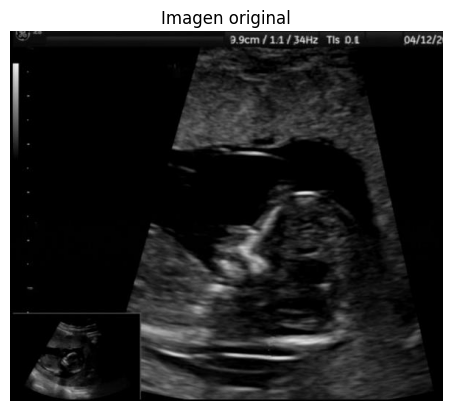

In [16]:
img_path = r'Dataset for Fetus Framework\Dataset for Fetus Framework\External Test Set\Standard\1426.png'
raw_img = My_Image(img_path)

fig_raw, ax_raw = plt.subplots()
ax_raw.imshow(raw_img, vmin=0, vmax=255, cmap='gray')
ax_raw.set_title('Imagen original')
plt.axis('off')
plt.show()

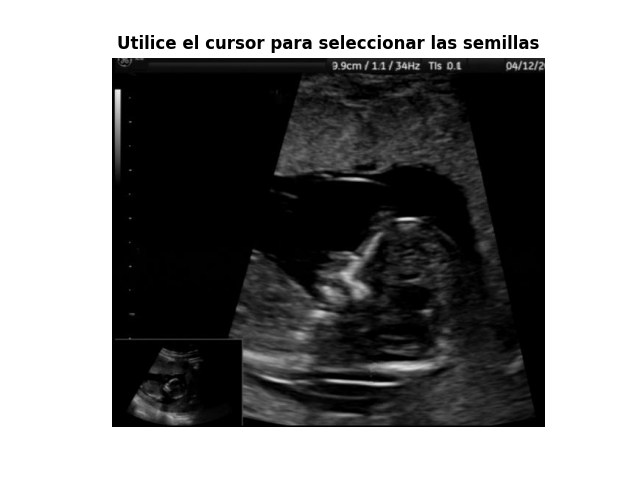

x=342, y=435
x=279, y=432


In [21]:
%matplotlib widget
x, y = (345, 369)
x_y_vals = []
def interactive_plot(img):
   plt.ion()
   fig, ax = plt.subplots()
   fig.canvas.set_cursor(mpl.backend_tools.Cursors.SELECT_REGION)
   ax.set_title('Utilice el cursor para seleccionar las semillas', fontweight='bold')

   def onclick(event):
      global x
      global y
      global x_y_vals
      x = int(np.ceil(event.xdata))
      y = int(np.ceil(event.ydata))
      x_y_vals.append((x, y))
      print(f"{x=}, {y=}")
      ax.plot(x, y, marker='x', color='yellow')
      ax.figure.canvas.draw()
      fig.canvas.set_cursor(mpl.backend_tools.Cursors.SELECT_REGION)

   ax.imshow(img, vmin=0, vmax=255, cmap='gray')
   plt.axis(False)
   fig.canvas.mpl_connect('button_press_event', onclick)
   plt.show()

interactive_plot(raw_img)

In [22]:
plt.close()
%matplotlib inline

In [23]:
#Calcular la distancia
def calcular_distancia(punto1, punto2):
    return np.sqrt((punto1[0] - punto2[0])**2 + (punto1[1] - punto2[1])**2)


img = My_Image(img_path)
imagen_binaria = img.binarizar_otsu()

#Definir la semilla para el crecimiento 
seed_point = x_y_vals[-2]

#Definir el segundo punto para calcular la distancia máxima
second_point = x_y_vals[-1]  

max_distance = calcular_distancia(seed_point, second_point)
segmented_image = imagen_binaria.region_growing(seed_point, thresh=10, max_dist=max_distance)
cv2.imwrite('imagen_rg.png', segmented_image)
cv2.imshow('Imagen RG', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Ahora, medimos con el método de la elipse

In [24]:
# Hallamos el borde
segmented_image[segmented_image > 0] = 255
KL1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
border_seg = segmented_image.filter_w_kernel(KL1)

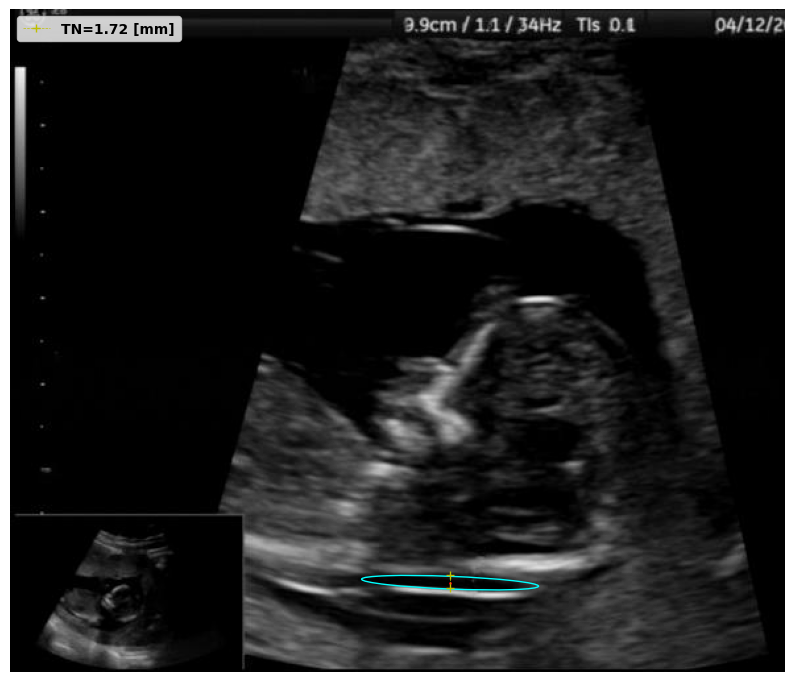

In [25]:
# Fitteamos la elipse nuevamente
ellipse_patch = border_seg.fit_ellipse()
plt.close()
raw_img.plot_with_ellipse(ellipse_patch, c=1/0.1719077568134172)